## Malaria Dataset from KAGGLE
## Context:
### Malaria is a life-threatening disease caused by parasites that is transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable. In 2018, there were an estimated 228 million cases of malaria worldwide. The estimated number of malaria deaths stood at 405 000 in 2018. Children aged under 5 years are the most vulnerable group affected by malaria;in 2018, they accounted for 67% (272 000) of all malaria deaths worldwide.The WHO African Region carries a disproportionately high share of the global malaria burden. In 2018, the region was home to 93% of malaria cases and 94% of malaria deaths.

#### Note: Context provided by Kaggle

## Import the necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [9]:
df = pd.read_csv('malaria.csv')

### First five rows of the dataset

In [10]:
df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


### Checking to see the number of null values present

In [11]:
df.isna().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

## Checking the number of different countries present

In [12]:
df.Country.value_counts()

Egypt                                    18
Kenya                                    18
Congo                                    18
Ecuador                                  18
Pakistan                                 18
Sierra Leone                             18
Democratic Republic of the Congo         18
Côte d'Ivoire                            18
Uganda                                   18
Guatemala                                18
Zambia                                   18
Namibia                                  18
Nigeria                                  18
Eswatini                                 18
Burkina Faso                             18
China                                    18
Mexico                                   18
Oman                                     18
Mozambique                               18
Argentina                                18
Republic of Korea                        18
Algeria                                  18
South Africa                    

## ...And the distribution of the Year in the dataset

In [13]:
df.Year.value_counts()

2017    108
2016    108
2001    108
2002    108
2003    108
2004    108
2005    108
2006    108
2007    108
2008    108
2009    108
2010    108
2011    108
2012    108
2013    108
2014    108
2015    108
2000    108
Name: Year, dtype: int64

In [14]:
df.Year.unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

## I drop the rows that contain the null values because I can't replace them

In [15]:
df.dropna(inplace = True)

## Confirmed no NaN's present in the dataset

In [16]:
df.isna().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

## Visualizing the data set according to the time sequence. There's a definite trend going up as the years go by. The number of malaria cases in the world is increasing

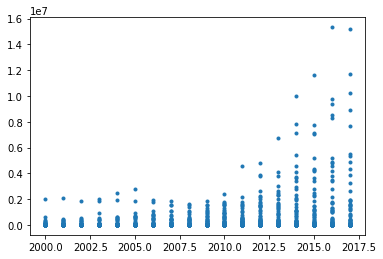

In [17]:
plt.scatter(df.Year, df['No. of cases'], marker ='.')

## Visualizing it using a line graph

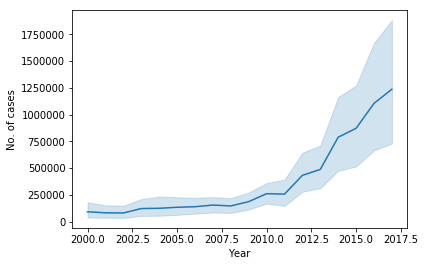

In [18]:
sns.lineplot('Year', 'No. of cases', data = df)

## I visualized it highlighting the number of deaths in each of the cases. The higher the number of death, the bigger the circle and the deeper the color.  In general, for each year the number of deaths increase as the cases get to their higher levels.

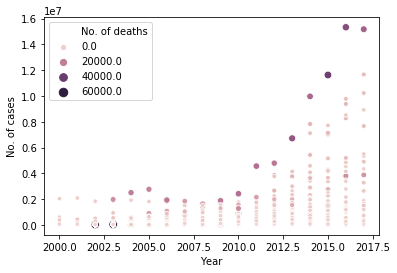

In [19]:
sns.scatterplot(df.Year,df['No. of cases'], data = df, hue = 'No. of deaths',size = 'No. of deaths')

## Highlighting the countries shows Africa has the highest amount of cases

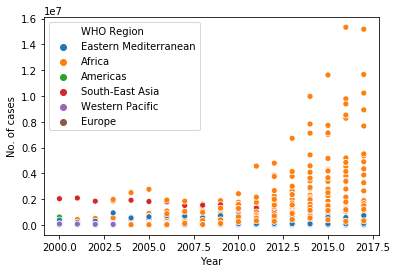

In [20]:
sns.scatterplot(df.Year,df['No. of cases'], data = df, hue = 'WHO Region')

## Let's look at number of deaths now. There's a spike in the number around 2002 and then it goes down, but it starts to rise from there till about 2015

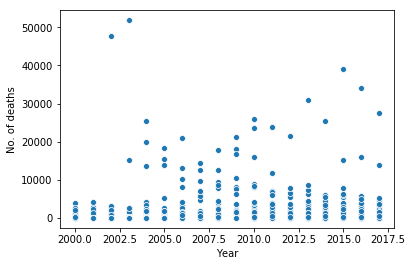

In [67]:
sns.scatterplot(df.Year,df['No. of deaths'], data = df)

## Another look at it as a line graph

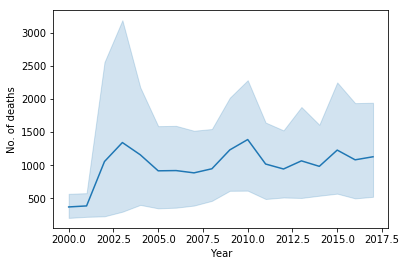

In [26]:
sns.lineplot(df.Year,df['No. of deaths'], data = df)

## Africa again carries the largest portion of the deaths

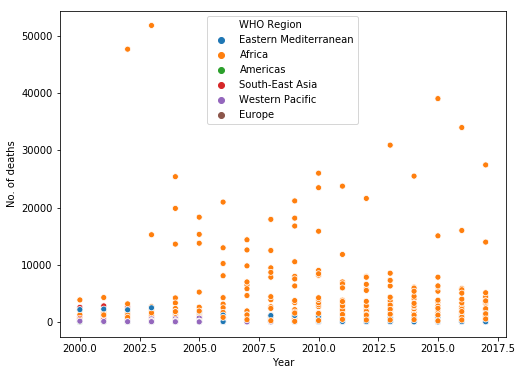

In [70]:
plt.figure(figsize = (8, 6))
sns.scatterplot(df.Year,df['No. of deaths'], data = df, hue = 'WHO Region')

## Highlighting the countries in the line graph shows a clearer burden of deaths in Africa from 2002 and onwards

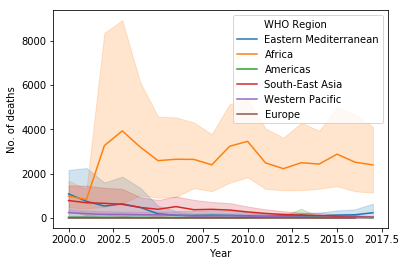

In [25]:
sns.lineplot(df.Year,df['No. of deaths'], data = df, hue = 'WHO Region')

### The scatterplot below compares number of cases to number of deaths, and it shows the majority of deaths happening in the latter years: 2008 and up

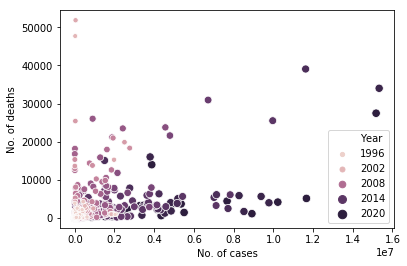

In [27]:
sns.scatterplot(df['No. of cases'],df['No. of deaths'], data = df,hue = 'Year', size = 'Year')

## This graph shows when comparing number of deaths to cases Africa still has the highest numbers

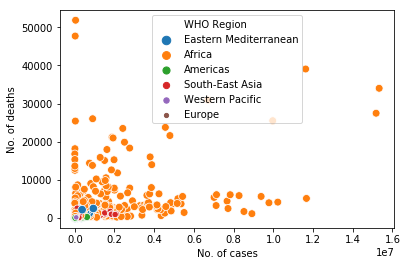

In [72]:
sns.scatterplot(df['No. of cases'],df['No. of deaths'], data = df,hue = 'WHO Region', size= "WHO Region")

## Let's look closely at Africa since it carries more of the burden of malaria cases. I seperated Africa from the dataset

In [33]:
df_Africa = df[df['WHO Region'] == 'Africa']

In [34]:
df_Africa.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
8,Benin,2017,1573163.0,2182.0,Africa
11,Botswana,2017,1900.0,17.0,Africa
13,Burkina Faso,2017,10225459.0,4144.0,Africa


### A bar graph shows the distribution of the cases in each African nation

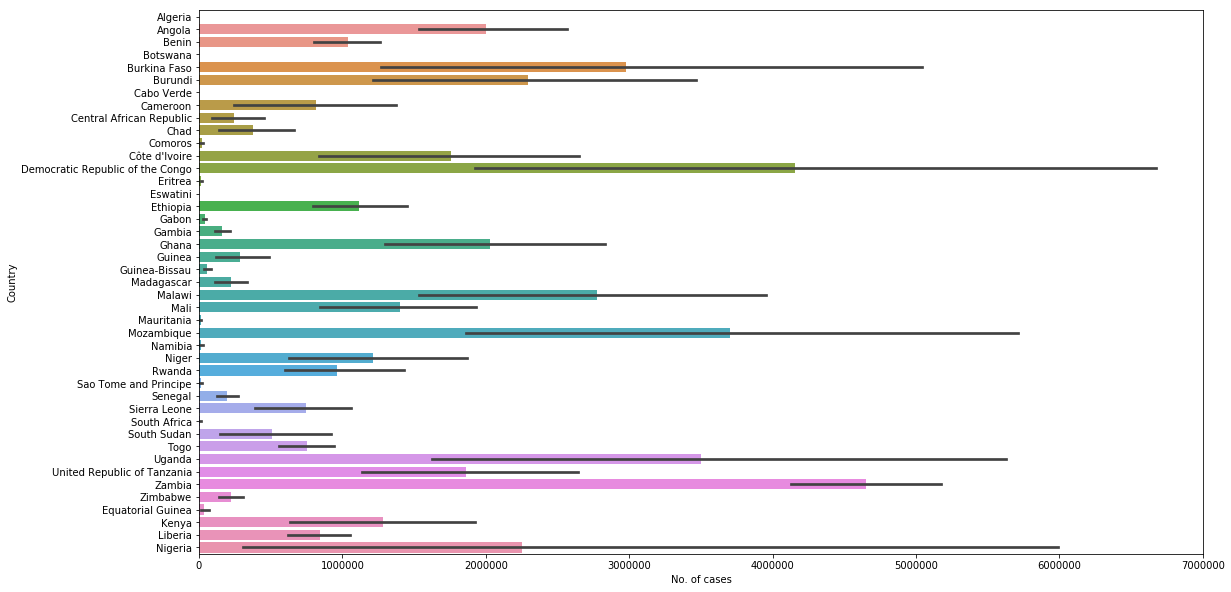

In [78]:
plt.figure(figsize = (18,10))
sns.barplot('No. of cases','Country', data = df_Africa)

### Below the number of cases in is increasing toward the latter part of the year, generally. And it's increasing in a few specific countries. The question that is why?...

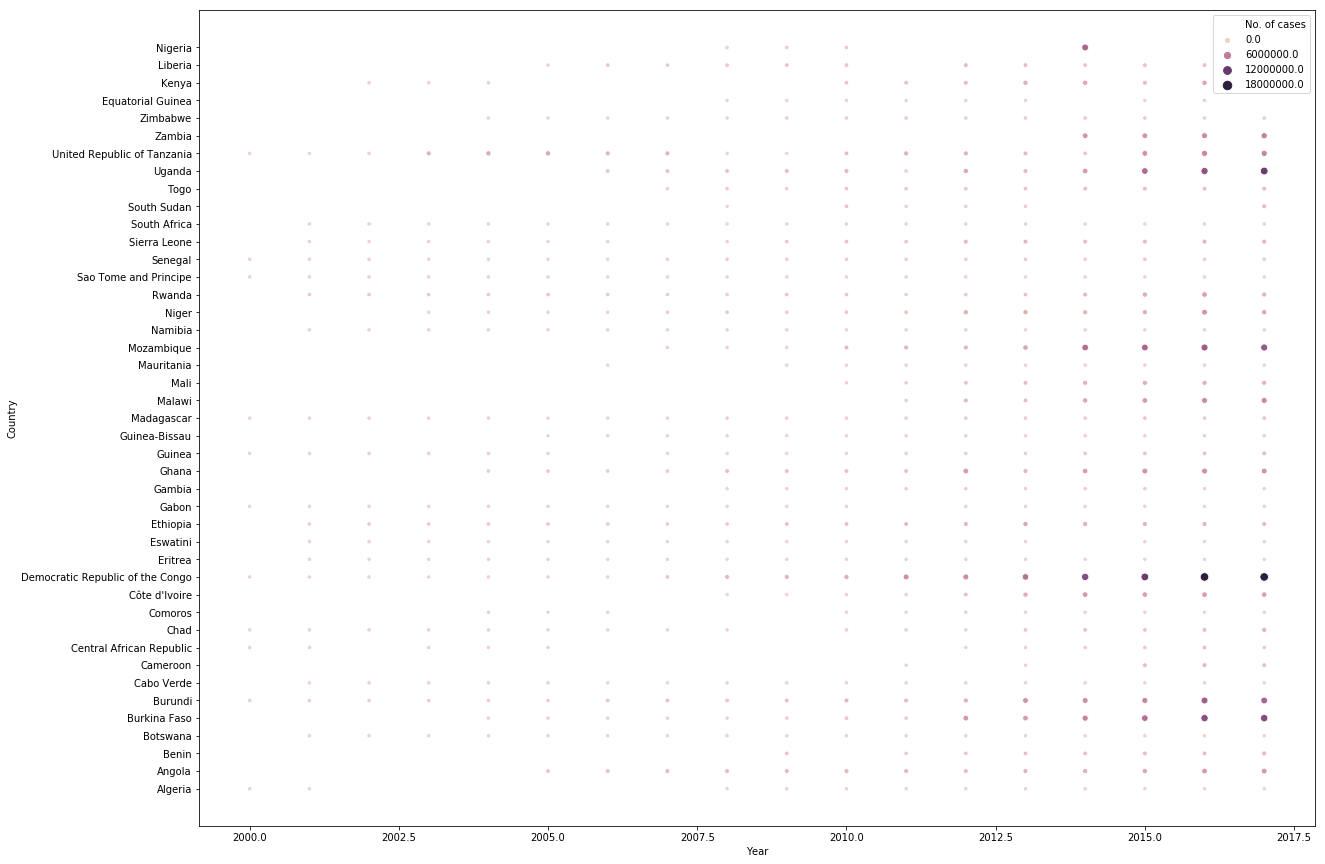

In [57]:
plt.figure(figsize = (20, 15))
sns.scatterplot('Year','Country', data = df_Africa,  hue = 'No. of cases', size  =  'No. of cases')

### Checking to see what the trend will look like when comparing number of cases versus number of deaths for African nations

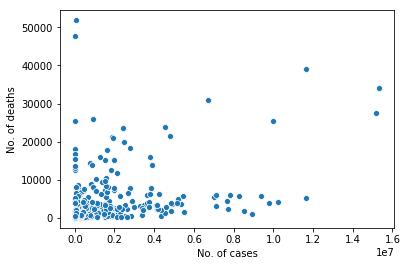

In [59]:
sns.scatterplot('No. of cases','No. of deaths', data = df_Africa)

## In the scatterplot below, the bigger the circle and the deeper the color, the higher the number of deaths in that nation. Democratic Republic of Congo shows consistently high numbers year after year. Kenya shows some high number of deaths, as well, between 2002 and 2005 and then the United Republic of Tanzania also show some high numbers.

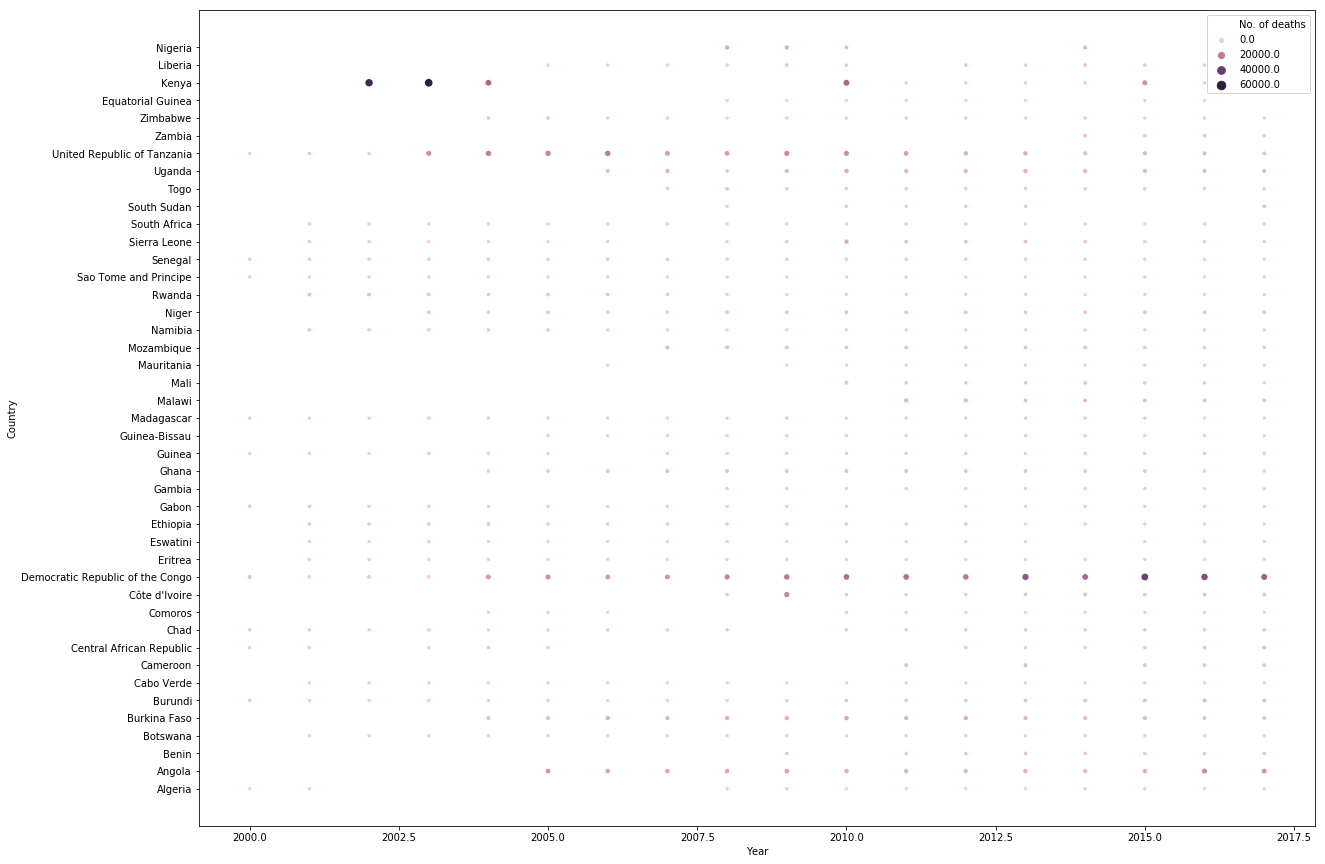

In [65]:
plt.figure(figsize = (20, 15))
sns.scatterplot('Year','Country', data = df_Africa, hue = 'No. of deaths', size  =  'No. of deaths')

### The number of deaths spikes in 2002, decreases to it's lowest level in 2007 and then starts to trend upwards as the years go by. The scatterplot above shows the majority of deaths happened in Kenya and the Republic of Tanzania. 

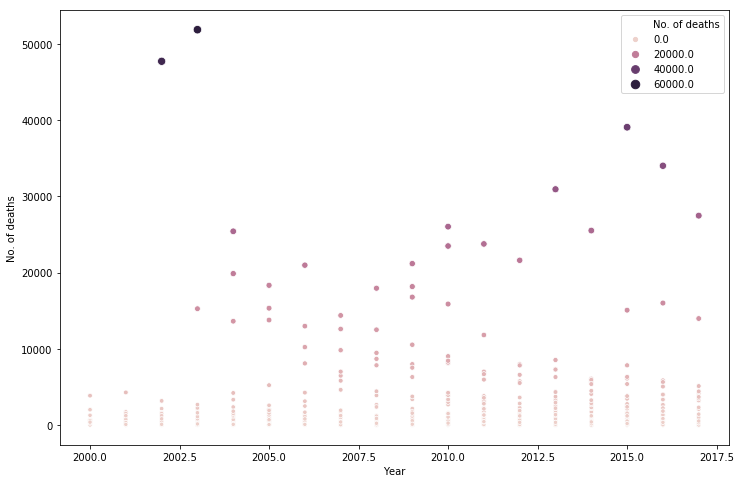

In [63]:
plt.figure(figsize = (12, 8))
sns.scatterplot('Year','No. of deaths', data = df_Africa, hue = 'No. of deaths', size  =  'No. of deaths')

## Even though in 2002 and 2003 the number of cases in the world was very low, Kenya and the Republic of Tanzania suffered quite a lot of deaths. The question to be answered is why? For both countries stong steps were taken to decrease the cases of malaria after 2004, which explains the decline of deaths during years that followed.

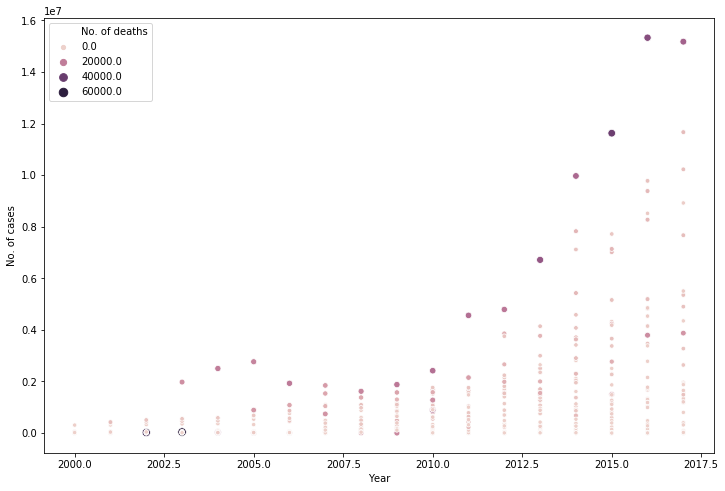

In [66]:
 plt.figure(figsize = (12, 8))
sns.scatterplot('Year','No. of cases', data = df_Africa, hue = 'No. of deaths', size  =  'No. of deaths')

## Africa does carry a disproportionately large amount of the cases of Malaria. The question now is why?

### Malaria occurs mostly in poor, tropical and subtropical areas of the world because of its warm and humid climate. In many of the countries affected by malaria, it is a leading cause of illness and death. In areas with high transmission, the most vulnerable groups are young children, who have not developed immunity to malaria yet, and pregnant women, whose immunity has been decreased by pregnancy. The costs of malaria – to individuals, families, communities, nations – are enormous
### Africa is the most affected due to a combination of factors:
#### A very efficient mosquito (Anopheles gambiae  complex) is responsible for high transmission.
#### The predominant parasite species is Plasmodium falciparum , which is the species that is most likely to cause severe malaria and death.
#### Local weather conditions often allow transmission to occur year round.
#### Scarce resources and socio-economic instability have hindered efficient malaria control activities.
#### In other areas of the world, malaria is a less prominent cause of deaths, but can cause substantial disease and incapacitation, especially in some countries in South America and South Asia.
###### From cdc.gov/malaria

### Democratic Republic of Congo (DRC) is the second-leading country in the world with malaria cases, after Nigeria, the most populous nation is Africa. Unfortunately, the data above doesn't contain Nigeria, so there's currently no way to compare the two nations statistics. However, there is Ethipia---which is the 2nd most populous country in the world, and DRC is the 4th---  and it doesn't show the high numbers you'd expect if proportion was playing a role in the number of cases and deaths due to malaria. So there is a reason for the high numbers in DRC.
### Malaria is among the principal cause of morbidity and mortality among pregnant women and children under 5 years of age in DRC for more than 40 percent of all outpatient visits in the nation.
### The majority of the population in DRC lives in a high malaria transmission zone, which is the equatorial and tropical zone (relating to, or near an equator of the earth). They are exposed to up to 100 infectious bites year round. Because of that it's estimated that DRC accounts for 9% of all malaria cases and 10% of all malaria deaths in sub-sahara Africa.
### As a result, intense efforts by the US President, who has a Malaria Initiative (PMI) to reduce the number of cases and deaths.
### Some the initiatives include:
####  Entomologic monitoring and insecticide resistance management by the Plasmodium parasite
#### Insecticide-treated nets  for people to sleep in
#### Malaria prevention and treatment during pregnancy
#### Pharmaceutical management
#### Social and behavior change is encouraged, among others
### Despite recent improvements in coverage of malaria interventions, DRC continues to experience challenges in access to preventive and curative malaria interventions. The enviroment in which they live also supports high transmission rate, so that's the add to the challenge